Семинар 4_1 (неделя 5): Сбор и очистка данных. Разведочный анализ данных (EDA)
=====

В данном разделе мы рассмотрим работу с пандас на примере данных с рейтингового агенства TMDB - оно оценивает популярность фильмов. Нам дан файл с портала facebook в котором описаны посты с фильмами, их режиссеры, год создания, количество "лайков" под фильмом и много другое.

Описание колонок данных:

In [1]:
#Для начала работы импортируем модуль pandas
import pandas as pd #создадим краткий псевдоним при импорте модуля
import matplotlib.pyplot as plt
import numpy as np

#установим отображение графиков на лету (иначе не будет отрисовки)
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('./movie_metadata.csv', sep=',') #загрузка данных с разделителем ','

In [3]:
data.head(10) #покажем первые 10 строк таблицы с "головы", тоже можно делать и с отдельным столбцом или их набором

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
#Можно не только посмотреть структуру данных но и типы данных, число заполненых полей
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Замечания по данным
1. Внизу мы видим число полей типа float-13, int-3 и объект (обычно строка или набор символов) -12
2. Колонка слева - имена столбцов
3. Колонка справа - число не нулевых значений по соответствующему признаку
4. Сверху общее число колонок и строк:
        RangeIndex: 5043 entries, 0 to 5042, Data columns (total 28 columns)

##### Итого сразу видим: 
число строк-записей 5043, число столбцов 28, есть столбцы разных типов, а так же имеются пропуски.
Как работать с пропусками и разными типами данных рассмотрим в будущих уроках

In [5]:
#Обращаться к data frame можно по имени столбца, посмотрим на заголовки фильмов
data['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [6]:
#Обращение к строке в data по индексу строки при помощи срезов и .iloc[,]
data.iloc[0,:]

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                   723.0
duration                                                                 178.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                   855.0
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                  1000.0
gross                                                              760505847.0
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

In [7]:
#Обращение к строке в data по названию колонки, индекса и .loc[,]
data.loc[0,'movie_title']

'Avatar\xa0'

In [8]:
"""
Cоздать новый столбец просто, как в словаре нам достаточно написать новое имя 
и передать значениевоспользуемся ранее изученной ламбда функцией и новым методом map
map-каждому значению столбца для которого вызывается метод присваивает результат функции lambda

"""

data['is_liked']=data['movie_facebook_likes'].map(lambda x: 1 if x>0 else 0) #если число лайков у фильма больше 0 - он лайкнут

data[['is_liked', 'movie_facebook_likes']].head() #пример вывода двух столбцов отдельно от всех

,is_liked,movie_facebook_likes
0,1,33000
1,0,0
2,1,85000
3,1,164000
4,0,0


### Предобработка данных

In [9]:
"""Выделим имена колонок для этого воспользуемся циклом FOR"""
for i in data.columns:
    print(i)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes
is_liked


In [10]:
"""Выберем в качестве целевой переменной число лайков в фейсбук к фильму и их наличие (т.е. популярность фильма в соц.сетях)"""
target_col=['movie_facebook_likes', 'is_liked']

In [11]:
"""Выделим только вещественные признаки для простоты, воспользуясь list_comprehension"""
float_col=[col for col in data.columns if data[col].dtypes!=object]

In [12]:
float_col

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes',
 'is_liked']

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'is_liked

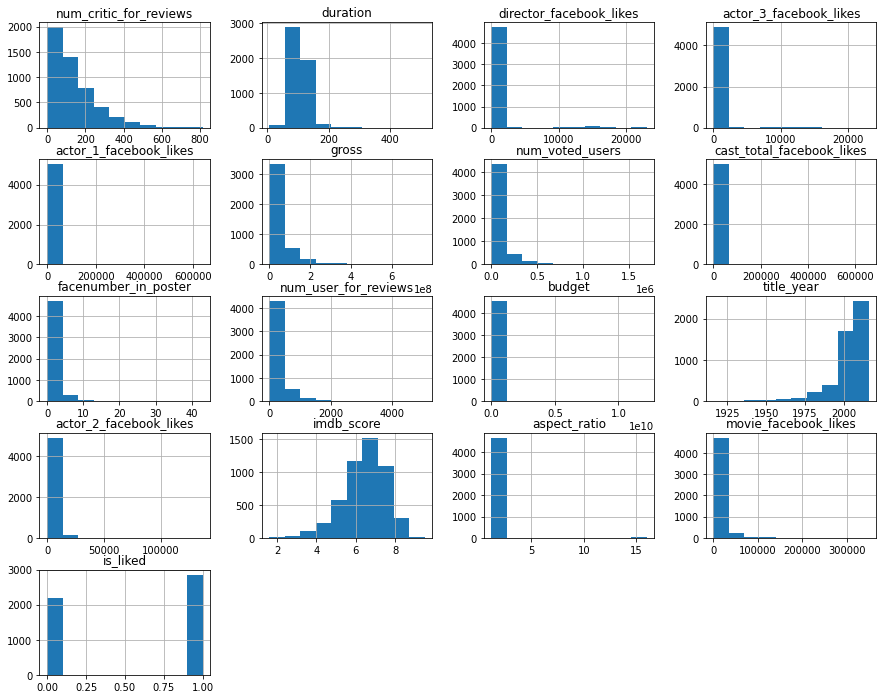

In [13]:
"""Посмотрим на распределение признаков"""
data.hist(figsize=(15,12))

In [14]:
#Выведем описательные статистики по данным
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_liked
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505,0.567519
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110,0.495469
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000,1.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000,1.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,1.000000


In [15]:
"""Восстановим пропуски в данных 3 способами"""

data_median=data[float_col].fillna(data[float_col].median())

data_mean=data[float_col].fillna(data[float_col].mean())

data_0=data[float_col].fillna(0)

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'is_liked

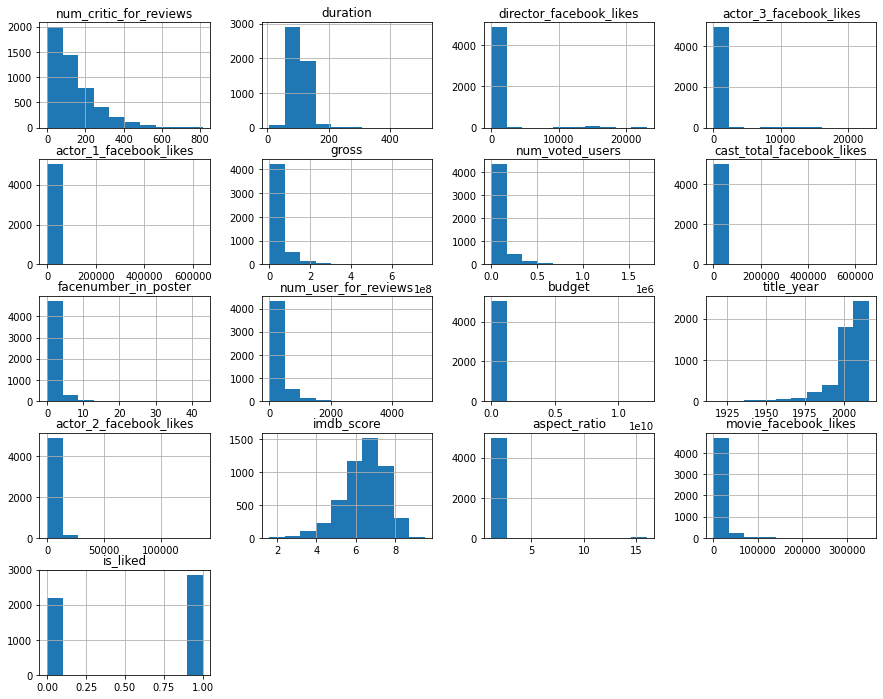

In [16]:
"""Посмотрим на распределение признаков для данным восстановленным по медианне"""
data_median.hist(figsize=(15,12))

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'is_liked

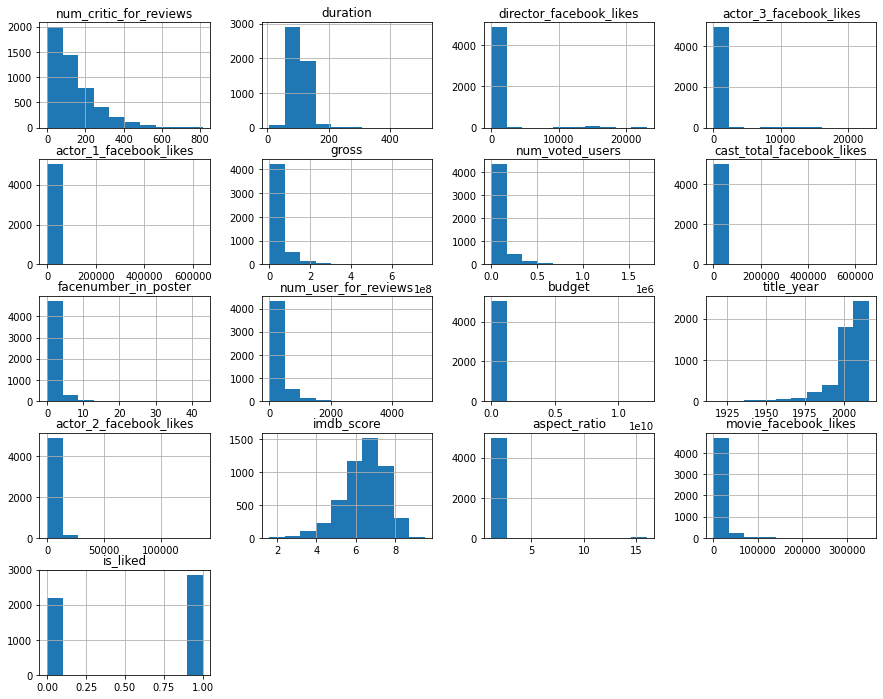

In [17]:
"""Посмотрим на распределение признаков по данным востановленным средними"""
data_mean.hist(figsize=(15,12))

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'is_liked

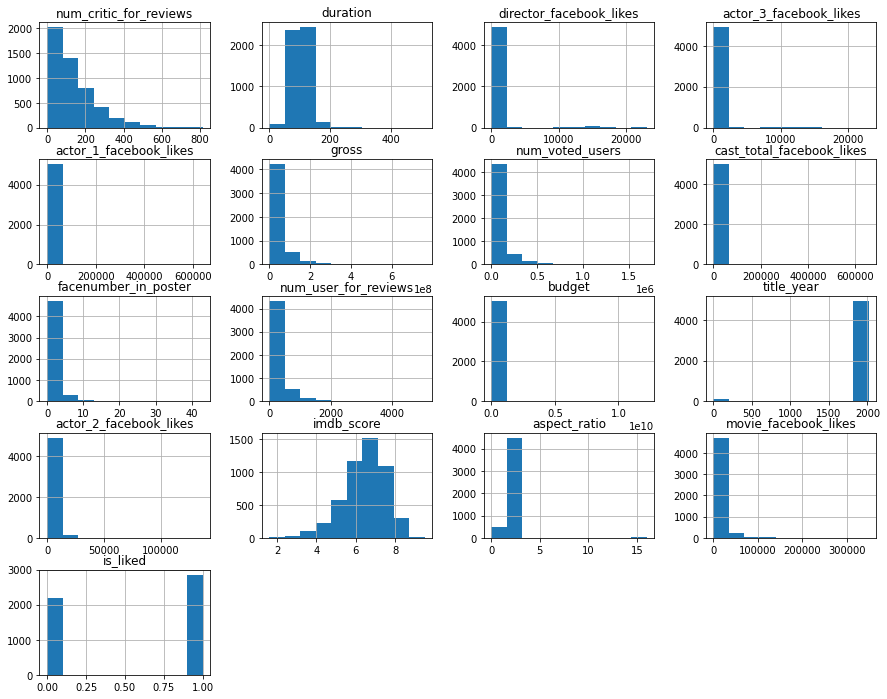

In [18]:
"""Посмотрим на распределение признаков при восстановлении пропусков нулём"""
data_0.hist(figsize=(15,12))

#### Выводы:
1. Восстановление при помощи зануления пропусков смещает выборку к "0". Поэтому воспользуемся по желанию выборкой восстановленной по медиане или среднему
2. Некоторые признаки слишком прижаты к "0", что говорит о том что их распределение лог-нормальное (т.е. такое, что если прологорифмировать данные в колонке, распределение изменится на "около" нормальное- этакую шляпу)
3. По диаграмме распределения уже можно увидеть значения которые отличаются от общей массы значений признаков - это скорее всего выбросы (редкие и необычные данные)

### Нахождение выбросов в данных
Оценим квартильный размах при помощи BoxPlot seaborn - или по другому "Ящик с усами"

Замечание: "Ящик с усами" показывает внутри данные входящие в зону нормальных значений, причем черта-это положение медианы (среднего), в рамках "усов" графика лежат по 25% данных в хвостах выборки, точки-это выбросы.

In [19]:
#Для нахождения выбросов воспользуемся модулем SEABORN
import seaborn as sns
sns.set()

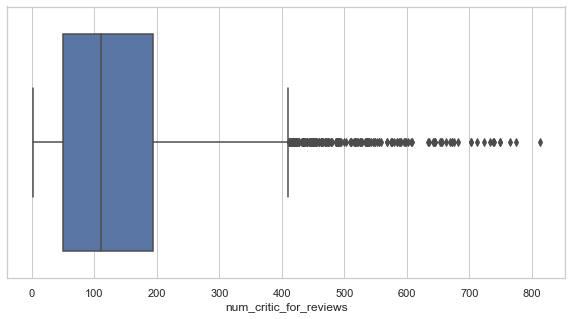

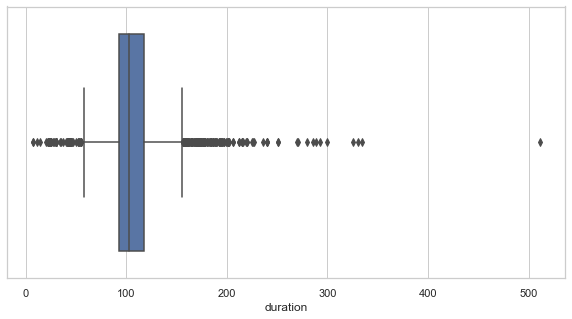

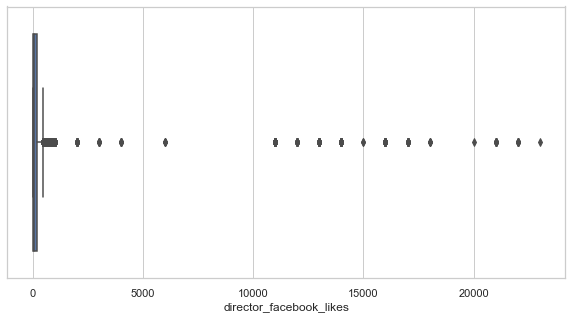

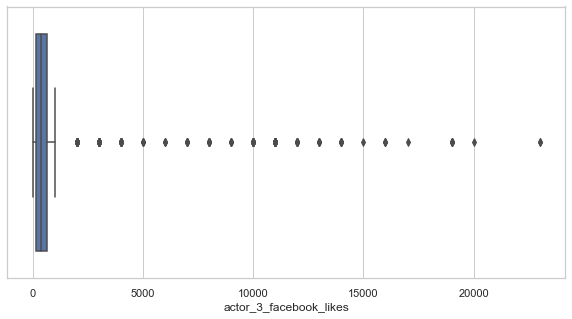

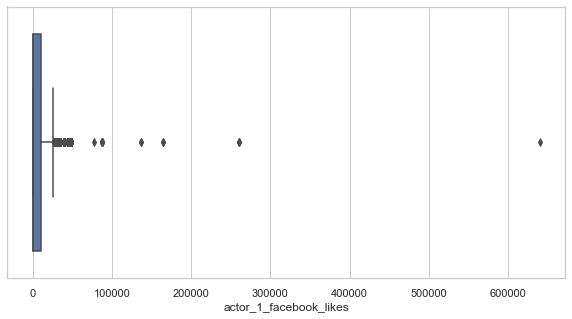

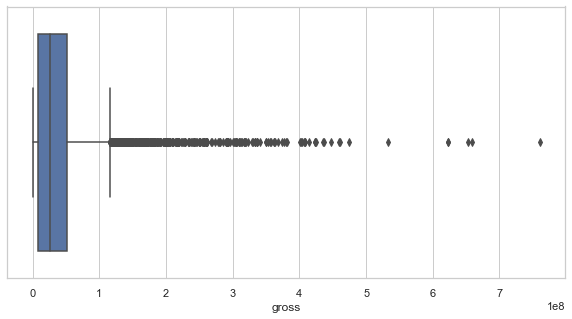

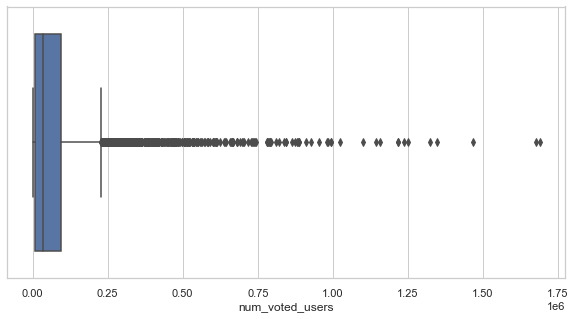

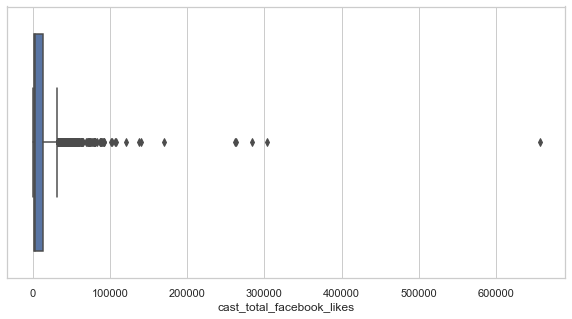

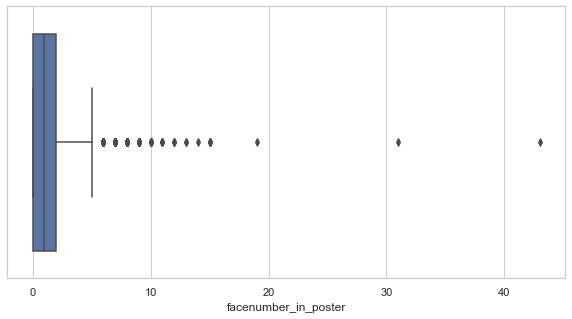

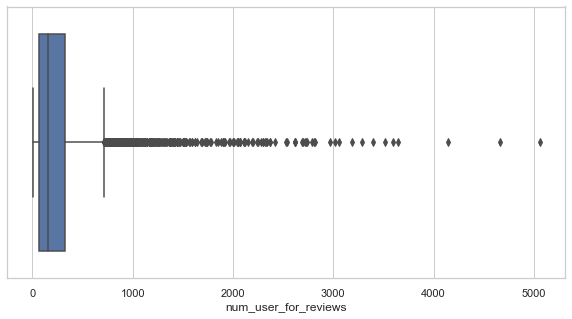

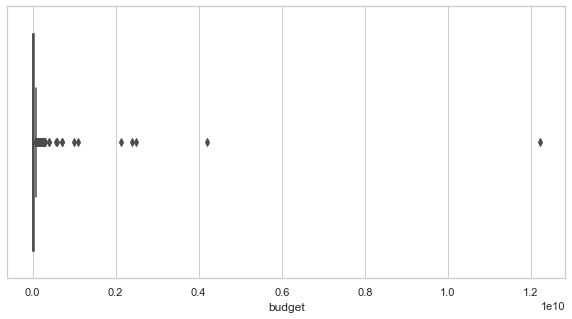

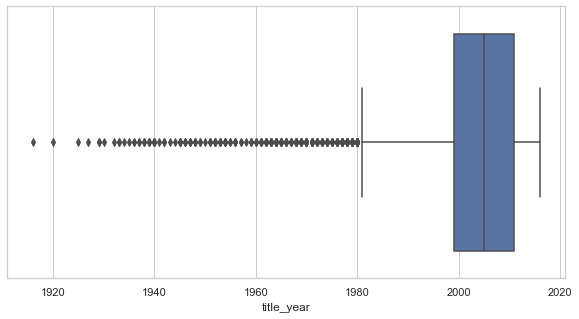

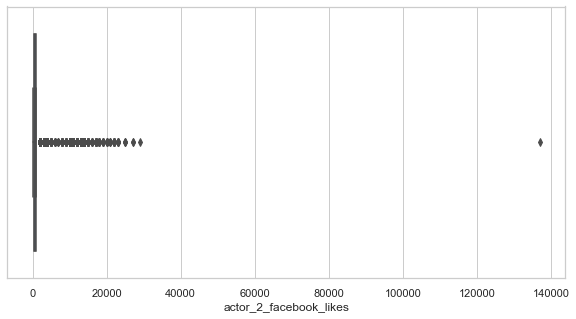

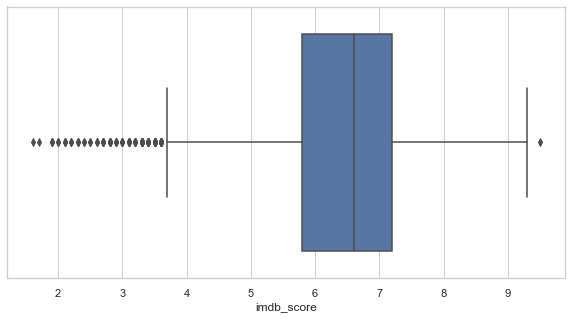

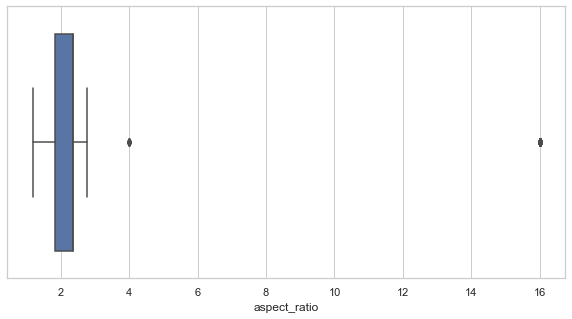

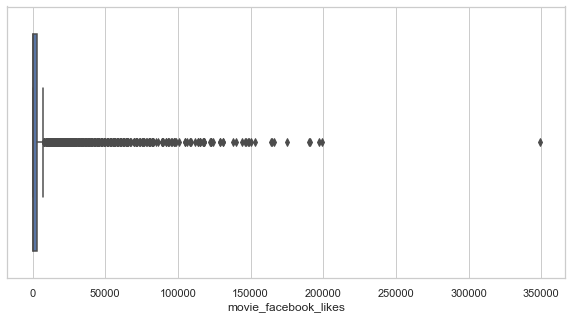

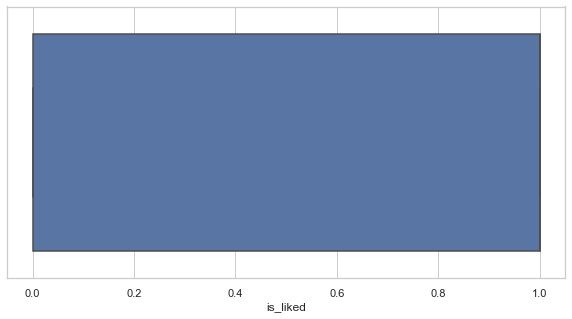

In [20]:
for col in float_col:
    plt.figure(figsize=(10,5)) #создаем поле для рисования
    sns.set_style("whitegrid") #выбираем формат поля
    ax1 = sns.boxplot(x=data_median[col]) #рисуем ящик с усами :)

#### Выводы по оценке "Ящика с усами":
Мы были правы выбросы есть почти в каждом признаке. Где-то их больше, где то меньше.
Что можно с ними сделать?
1. Заменить такие аномалии на их ближайших "нормальных" соседей из области "усов" ящика
2. Можно лениаризовать данные путем логарифмирования и возможно выбросы "схлопнутся"

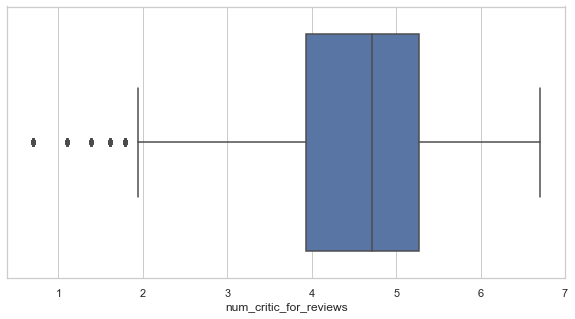

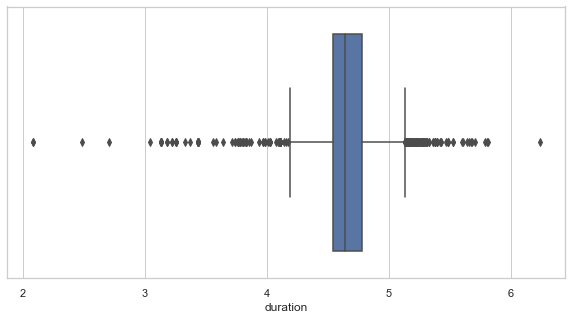

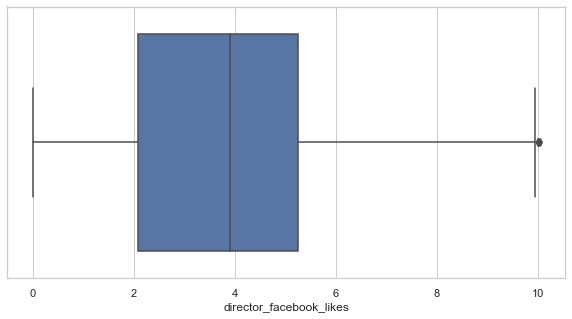

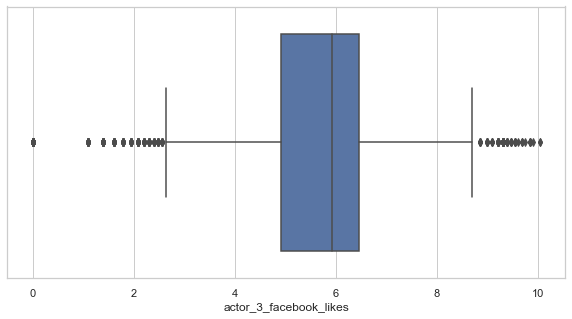

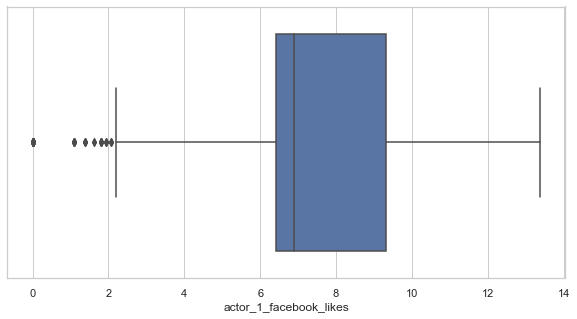

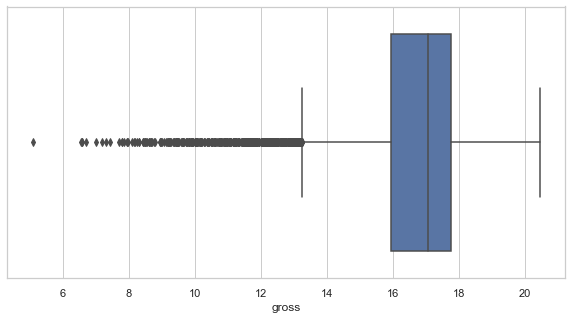

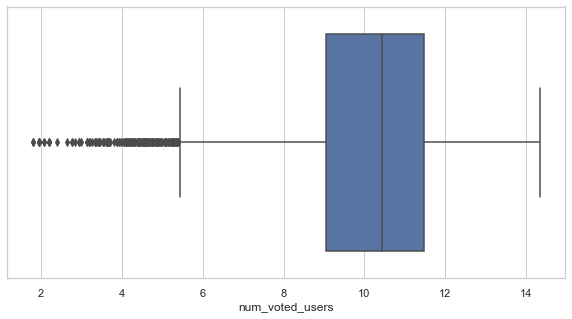

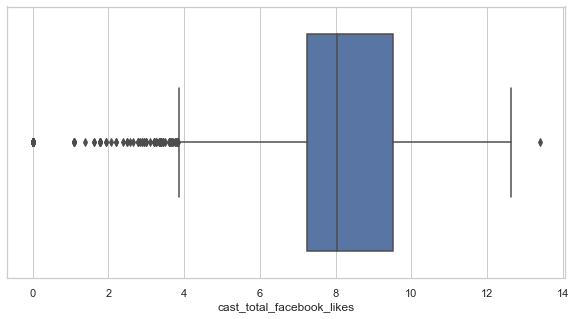

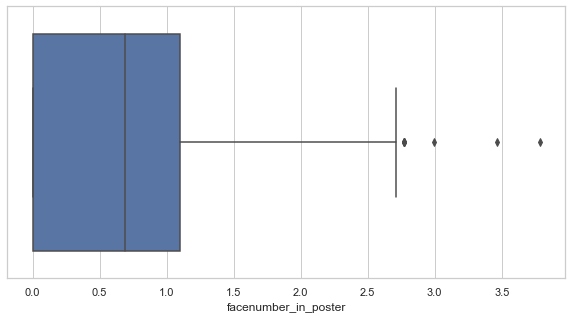

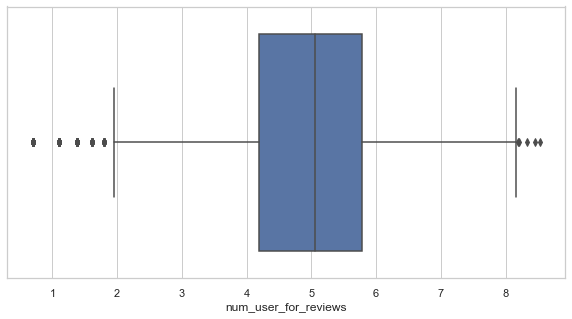

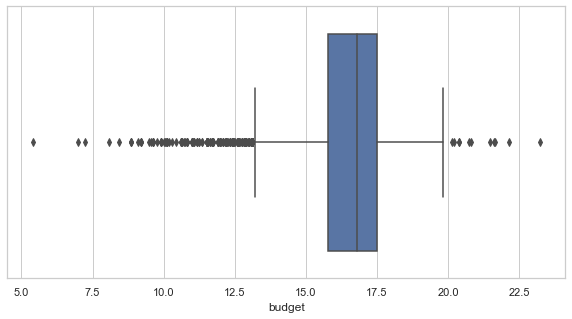

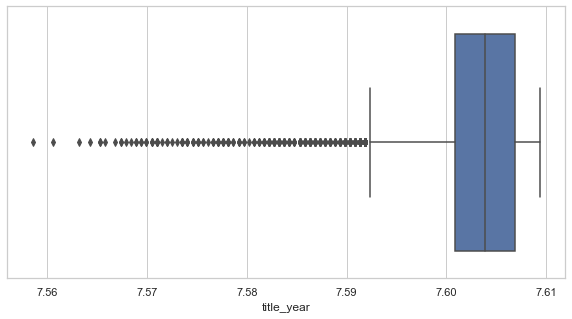

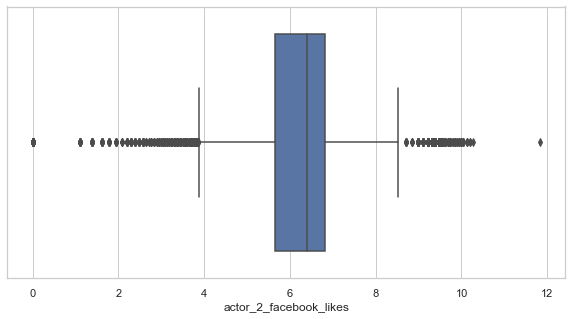

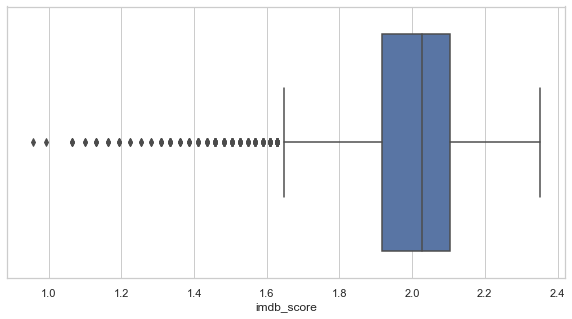

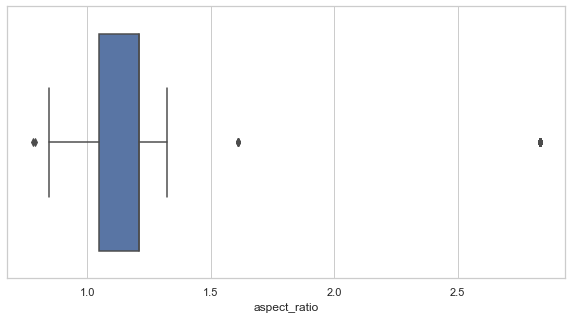

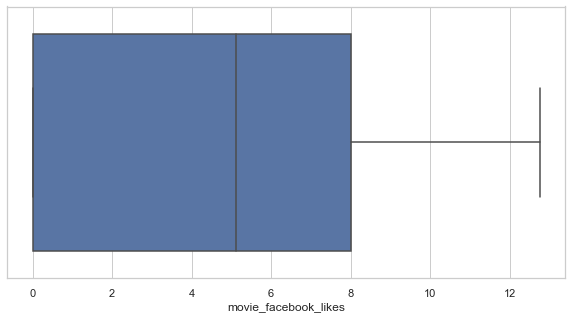

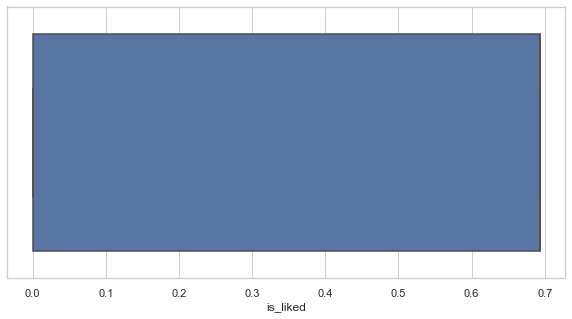

In [21]:
#Давайте попробуем прологарифмировать каждую колонку и посмотрим насколько изменятся ящики с усами
for col in float_col:
    plt.figure(figsize=(10,5)) #создаем поле для рисования
    # sns.set_style("whitegrid") #выбираем формат поля
    log_data=np.log(1+data_median[col]) #процедура логарифмирования
    ax1 = sns.boxplot(x=log_data) #рисуем ящик с усами :)

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>],
       [<AxesSubplot:title={'center':'is_liked

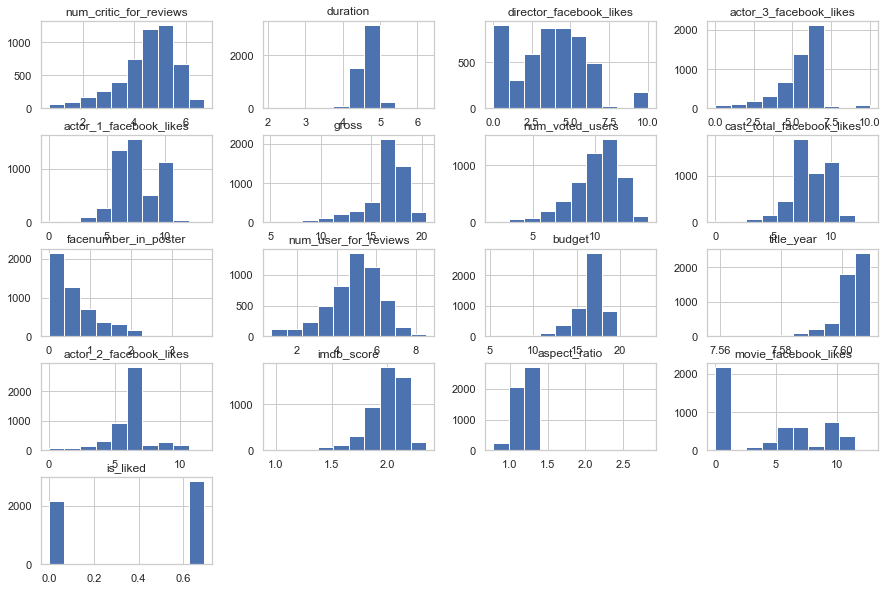

In [22]:
#Построим на этих же данных диаграммы распределения признаков
np.log(1+data_median[float_col]).hist(figsize=(15,10))

### Выводы:
1. Распределения некоторых признаков стали ближе к нормальным
2. Где-то нам удалось побороть большинство выбросов, а где-то нет. Тут уже выбирать вам как их убирать -оставить как есть или приравнять крайним нормальным значениям из усов ящика

Задание: попробуйте для каждого признака, где имеются выбросы, приравнять их к граничным данным ящика. Сделать это довольно просто. Достаточно для каждого признака найти значение лежащее в 3-ех отклонениях от среднего. Ниже приведен пример как это можно сделать.

In [23]:
#Найдем границы "нормальности" в ящике с усами для колонки imdb_score
#если верить вики то реально граница 2.7 отклонения, что почти 3 (если огруглять)
normal_imdb_left = data_median['imdb_score'].median() - 2.698 * data_median['imdb_score'].std()
print('граница ящика слева',normal_imdb_left )

normal_imdb_right = data_median['imdb_score'].median() + 2.698 * data_median['imdb_score'].std()
print('граница ящика справа',normal_imdb_right )

граница ящика слева 3.5644373942528538
граница ящика справа 9.635562605747145


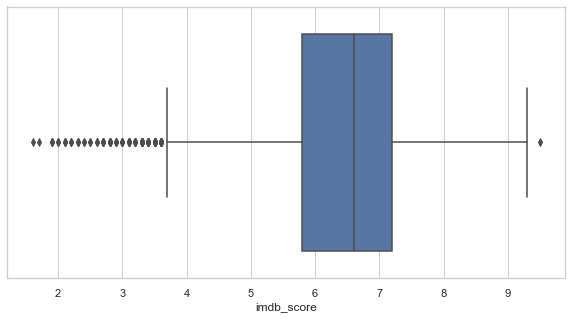

In [24]:
#Давайте убедимся, что это так
plt.figure(figsize=(10,5)) #создаем поле для рисования
sns.set_style("whitegrid") #выбираем формат поля
ax1 = sns.boxplot(x=data_median['imdb_score']) #рисуем ящик с усами :)

In [25]:
def get_normal_value(x):
    if x>normal_imdb_right:
        return normal_imdb_right
    if x<normal_imdb_left:
        return normal_imdb_left
    return x

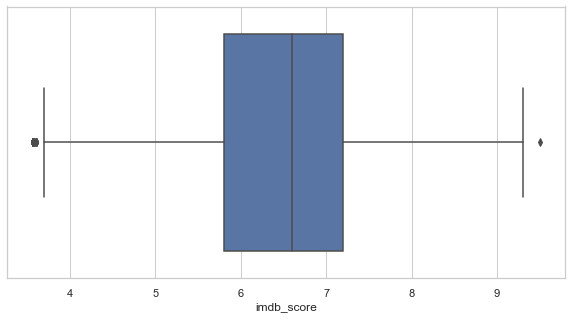

In [26]:
#Теперь можем убрать почти все выбросы путем приведения данных выходящих за границу к граничным
data_median['imdb_score']=data_median['imdb_score'].map(lambda x: get_normal_value(x))

#ещё раз построим boxplot 
plt.figure(figsize=(10,5))
sns.set_style("whitegrid") 
ax1 = sns.boxplot(x=data_median['imdb_score']) 

### Корреляция в данных
Под корреляцией подразумевают зависимости между признаками в данных. Если один признал линейно зависим от другого (или около того) показатель корреляции будет по модулю близок к 1. Если Данные коррелируют положительно и то корреляция близка к +1, если отрицательно к -1, если корреляция слабая (данные слабо друг от друга зависят) то корреляция не превосходит по модулю "0.5"

In [27]:
"""Чтобы получить таблицу корреляций признаков между собой воспользуемся pandas.corr()"""
data_median[float_col].corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_liked
num_critic_for_reviews,1.000000,0.257531,0.183657,0.271857,0.191033,0.486001,0.625106,0.263886,-0.033749,0.609531,0.121572,0.266797,0.282912,0.304503,-0.053660,0.683412,0.078197
duration,0.257531,1.000000,0.162048,0.123717,0.088779,0.231116,0.314881,0.123160,0.013068,0.328020,0.069681,-0.127405,0.132069,0.264649,-0.089716,0.196726,-0.029539
director_facebook_likes,0.183657,0.162048,1.000000,0.121046,0.092232,0.145844,0.297940,0.120986,-0.041472,0.223538,0.022747,-0.064740,0.120900,0.166130,-0.015580,0.162060,0.005763
actor_3_facebook_likes,0.271857,0.123717,0.121046,1.000000,0.250095,0.315926,0.287418,0.473973,0.099764,0.230540,0.049163,0.094854,0.559730,0.051576,-0.005114,0.278979,0.055130
actor_1_facebook_likes,0.191033,0.088779,0.092232,0.250095,1.000000,0.155214,0.193047,0.951657,0.072615,0.146159,0.024839,0.084880,0.390642,0.074322,-0.019706,0.135503,-0.035586
gross,0.486001,0.231116,0.145844,0.315926,0.155214,1.000000,0.639502,0.246457,-0.025026,0.565541,0.112482,0.040477,0.273519,0.175628,-0.013117,0.384643,0.006044
num_voted_users,0.625106,0.314881,0.297940,0.287418,0.193047,0.639502,1.000000,0.265911,-0.026885,0.798417,0.083001,0.005641,0.271030,0.419914,-0.018282,0.537924,0.088144
cast_total_facebook_likes,0.263886,0.123160,0.120986,0.473973,0.951657,0.246457,0.265911,1.000000,0.091589,0.207388,0.038935,0.108048,0.628478,0.084150,-0.018570,0.209786,-0.019010
facenumber_in_poster,-0.033749,0.013068,-0.041472,0.099764,0.072615,-0.025026,-0.026885,0.091589,1.000000,-0.068690,-0.018868,0.060922,0.071720,-0.064568,0.013235,0.008577,0.003870
num_user_for_reviews,0.609531,0.328020,0.223538,0.230540,0.146159,0.565541,0.798417,0.207388,-0.068690,1.000000,0.087918,-0.005970,0.220055,0.297970,-0.028308,0.400888,-0.006011


<AxesSubplot:>

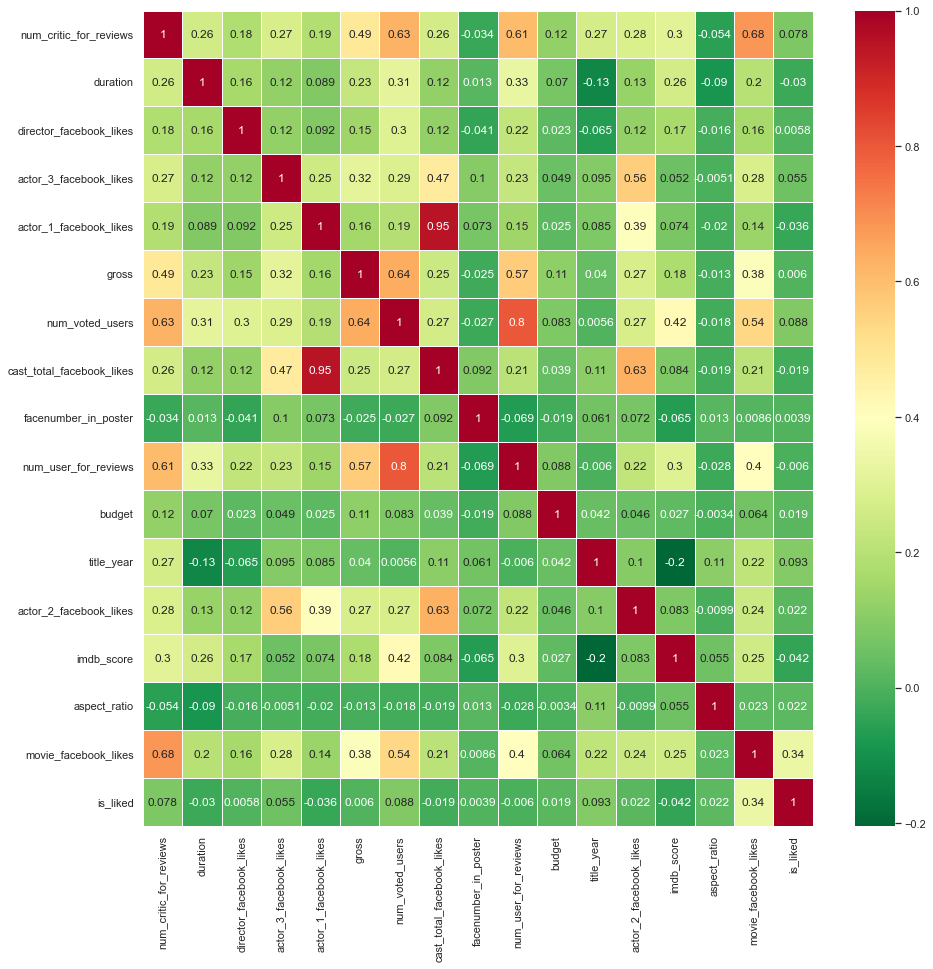

In [28]:
#Т.к. таблица не очень представительна - её трудно читать построим тепловую карту "heatmap"
plt.figure(figsize=(15,15))
sns.heatmap(data_median.corr(), cmap='RdYlGn_r', linewidths=1, annot=True)

#### Выводы: 
Благодаря тепловой карте корреляций мы можем  наглядно и просто судить о том, какие переменные взаимосвязанны и в какой мере. Чем "горячее" (краснее) цвет тем ближе к линейной положительной связи, чем свет "спокойнее" (зеленее), тем меньше связь.

#### Вопросы:
Как может помочь информация о наличии связей между признаками?

Что делать с признаками если связь отсуствует?
